**1. Generate 100 data from a bivariate normal distribution with uncorrelated coefficient and different means: mean =$[5,0]$ and cov = $[[3, 0], [0, 6]]$ and label this data blue. Your out should be a pandas data called df_1 with colum $X_1, X_2$ and 'color' (constant ='Blue'). Because random initialization your data will be same as the one in this example.**

**Hint**: Check the [multivariategenerator](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.multivariate_normal.html) numpy documentation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mean = [5,0]

In [3]:
cov = [[3,0], [0,6]]

In [4]:
data = np.random.default_rng().multivariate_normal(mean, cov, 100)

In [5]:
df_1 = pd.DataFrame(data, columns = ['X1', 'X2'])

In [6]:
color = ["Blue" for i in range(100)]
df_1['color'] = color

In [7]:
df_1.head()

,X1,X2,color
0,4.191752,2.521940,Blue
1,3.926998,0.541319,Blue
2,0.552824,-3.323295,Blue
3,3.049895,-2.769250,Blue
4,4.542489,-2.922157,Blue


**2. Generate 100 data from a bivariate normal distribution with uncorrelated coefficient and different means: mean =$[-1, 2]$ and cov = $[[10, 0], [0, 10]]$ and label this data blue. Your out should be a pandas data called df_2 with colum $X_1, X_2$ and 'color' (constant ='Orange'). Because random initialization your data will be same as the one in this example.**

In [8]:
mean = [-1,2]
cov = [[10,0], [0,10]]

In [9]:
data2 = np.random.default_rng().multivariate_normal(mean, cov, 100)
df_2 = pd.DataFrame(data2, columns = ['X1', 'X2'])

In [10]:
df_2['color'] = ["Orange" for i in range(100)]

In [11]:
df_2.head()

,X1,X2,color
0,-1.920591,2.603030,Orange
1,-2.501499,2.073049,Orange
2,2.127203,2.585769,Orange
3,2.354370,1.580268,Orange
4,-1.791188,4.835467,Orange


**3. Combine df_1 and df_2 using [pandas](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) and show the head of the new data**

In [12]:
df = pd.concat([df_1, df_2])

In [13]:
df.head()

,X1,X2,color
0,4.191752,2.521940,Blue
1,3.926998,0.541319,Blue
2,0.552824,-3.323295,Blue
3,3.049895,-2.769250,Blue
4,4.542489,-2.922157,Blue


**4. Plot scatter of X_1 vs X_2 and color by the 'color' colum**

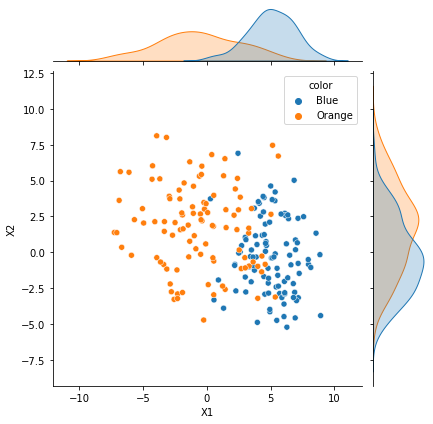

In [14]:
df = df.reset_index()
sns.jointplot(data = df, x = "X1", y = "X2", hue = "color")

**5. create a response "Y" with value 0 if color is blue and 1 otherwise and show the head of the new data**

In [15]:
df['Y'] = df['color'].apply(lambda x: 0 if x == 'Blue' else 1)

In [16]:
df.head()

,index,X1,X2,color,Y
0,0,4.191752,2.521940,Blue,0
1,1,3.926998,0.541319,Blue,0
2,2,0.552824,-3.323295,Blue,0
3,3,3.049895,-2.769250,Blue,0
4,4,4.542489,-2.922157,Blue,0


**6. Fit a linear of regression $Y=\beta_0+\beta_1 X_1+\beta_2X_2 +\epsilon$. Hint: check [sklearnlinerreg](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)**

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# Data
X = df[['X1','X2']]
X

,X1,X2
0,4.191752,2.521940
1,3.926998,0.541319
2,0.552824,-3.323295
3,3.049895,-2.769250
4,4.542489,-2.922157
...,...,...
195,0.535709,-2.964247
196,-6.687353,0.348468
197,1.487653,2.970094
198,-2.908321,3.734411


In [19]:
# Response
y = df['Y']
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 200, dtype: int64

In [20]:
# Create linear regression object
reg = LinearRegression()
# Fit the model
reg.fit(X, y)

LinearRegression()

In [21]:
reg.score(X, y)

0.5723241747456886

In [22]:
reg.coef_

array([-0.09249033,  0.02011895])

In [23]:
reg.intercept_

0.6887021771751911

**7. Plot scatter of X_1 vs X_2, color by the 'color' colum and include the linear regession boundary i.e line $\hat{\beta_0}+\hat{\beta_1} X_1+\hat{\beta_2} X_2=0.5$**

In [24]:
def f(x):
    return (0.5-reg.intercept_-reg.coef_[0]*x)/reg.coef_[1]

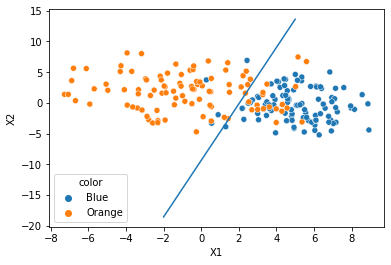

In [25]:
sns.scatterplot(data = df, x = "X1", y = "X2", hue = "color")
plt.plot([-2,5], [f(-2), f(5)])

**8. Fit KNN models with $k=15$ and $k=1$ respectively and in each case, make predictions and plot the scatter of X_1 vs X_2 by color and the KNN boundary**

In [26]:
from sklearn import neighbors

In [27]:
# Data
x = df[['X1','X2']].to_numpy()
y = df['Y']

# Train the Classifier
knn15 = neighbors.KNeighborsClassifier(15, weights='uniform')
knn15.fit(x, y)
knn1 = neighbors.KNeighborsClassifier(1, weights='uniform')
knn1.fit(x, y)

KNeighborsClassifier(n_neighbors=1)

Text(0.5, 1.0, 'KNN with k = 15')

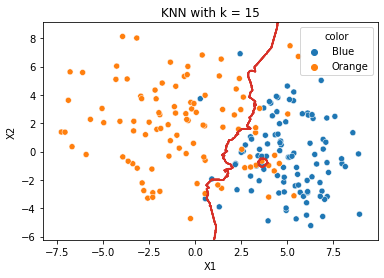

In [28]:
PAD = 1.0 # how much to "pad" around the min/max values. helps in setting bounds of plot
# create a mesh to plot in
x_min, x_max = x[:, 0].min() - PAD, x[:, 0].max() + PAD
y_min, y_max = x[:, 1].min() - PAD, x[:, 1].max() + PAD

H = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, H), np.arange(y_min, y_max, H))
Z = knn15.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors = ['#d73027'])

# Plot data
sns.scatterplot(data = df, x = "X1", y = "X2", hue = "color")
plt.title("KNN with k = 15")

Text(0.5, 1.0, 'KNN with k = 1')

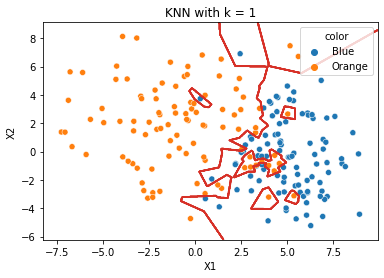

In [29]:
PAD = 1.0 # how much to "pad" around the min/max values. helps in setting bounds of plot
# create a mesh to plot in
x_min, x_max = x[:, 0].min() - PAD, x[:, 0].max() + PAD
y_min, y_max = x[:, 1].min() - PAD, x[:, 1].max() + PAD

H = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, H), np.arange(y_min, y_max, H))
Z = knn1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors = ['#d73027'])

# Plot data
sns.scatterplot(data = df, x = "X1", y = "X2", hue = "color")
plt.title("KNN with k = 1")

**9.a Generate 10 means $m_k$ from a bivariate Gaussion $N((1,0)^T,I)$**

In [30]:
from scipy.stats import multivariate_normal as mvnorm

In [31]:
means_blue = mvnorm(mean=[0,1],cov=np.eye(2)).rvs(10)

In [32]:
means_blue

array([[-1.11651088,  0.99028315],
       [-0.2725405 ,  0.26281018],
       [ 1.68185287,  1.26024663],
       [-1.47748462,  0.94140501],
       [-0.60330545,  2.83859974],
       [ 0.65373198,  0.43102644],
       [ 1.82723713,  1.76371726],
       [-0.46163107, -0.18859163],
       [ 0.14807961,  1.24728684],
       [ 1.30784643, -0.43557271]])

In [33]:
means_blue[0]

array([-1.11651088,  0.99028315])

**9.b For each i from 1 to 100, randomly select $m_k$ and generate a number the multivariate binormal distribution with mean = selected $m_k$ and cov = $[[1/5, 0], [0, 1/5]]$. Save these 100 bivariate data into pandas data frame df_1_mix and add 'color' (Blue) colum. df_1_mix will column X_1,X_2 and color**

In [34]:
import random

In [35]:
df_1_mix = pd.DataFrame(columns = ['X1', 'X2'])
for i in range(100):
    rand = random.randrange(10)
    rand_mean = means_blue[rand]
    cov = [[1/5, 0], [0, 1/5]]
    x = np.random.default_rng().multivariate_normal(rand_mean, cov, 1)
    df_1_mix.loc[len(df_1_mix)] = x[0]
df_1_mix.head()

,X1,X2
0,-2.275879,0.402107
1,-1.814863,0.830801
2,0.806232,0.294673
3,-0.112960,0.433300
4,0.818213,0.969071


In [36]:
color = ["Blue" for i in range(100)]
df_1_mix['color'] = color

In [37]:
df_1_mix.head()

,X1,X2,color
0,-2.275879,0.402107,Blue
1,-1.814863,0.830801,Blue
2,0.806232,0.294673,Blue
3,-0.112960,0.433300,Blue
4,0.818213,0.969071,Blue


**10.a Generate 10 means $m_k$ from a bivariate Gaussion $N((1,0)^T,I)$**

In [38]:
means_orange = mvnorm(mean=[0,1],cov=np.eye(2)).rvs(10)

**10.b For each i from 1 to 100, randomly select $m_k$ and generate a number the multivariate binormal distribution with mean = selected $m_k$ and cov = $[[1/5, 0], [0, 1/5]]$. Save these 100 bivariate data into pandas data frame df_2_mix and add 'color' (Orange) colum. df_2_mix will column X_1,X_2 and color**

In [39]:
df_2_mix = pd.DataFrame(columns = ['X1', 'X2'])
for i in range(100):
    rand = random.randrange(10)
    rand_mean = means_orange[rand]
    cov = [[1/5, 0], [0, 1/5]]
    x = np.random.default_rng().multivariate_normal(rand_mean, cov, 1)
    df_2_mix.loc[len(df_2_mix)] = x[0]
df_2_mix.head()

,X1,X2
0,1.396718,1.190475
1,-0.085267,1.018010
2,-1.687843,1.202988
3,-0.881717,-1.292920
4,-0.183887,1.448359


In [40]:
color = ["Orange" for i in range(100)]
df_2_mix['color'] = color
df_2_mix.head()

,X1,X2,color
0,1.396718,1.190475,Orange
1,-0.085267,1.018010,Orange
2,-1.687843,1.202988,Orange
3,-0.881717,-1.292920,Orange
4,-0.183887,1.448359,Orange


**11. Concate df_1_mix and df_2_mix into a pandas dataframe called df_mix and repeat question 4 to 8 using df_mix data**

In [41]:
df_mix = pd.concat([df_1_mix, df_2_mix])
df_mix

,X1,X2,color
0,-2.275879,0.402107,Blue
1,-1.814863,0.830801,Blue
2,0.806232,0.294673,Blue
3,-0.112960,0.433300,Blue
4,0.818213,0.969071,Blue
...,...,...,...
95,-0.771427,-0.918914,Orange
96,-0.761646,1.792408,Orange
97,-2.737360,-0.731359,Orange
98,0.038833,1.287756,Orange


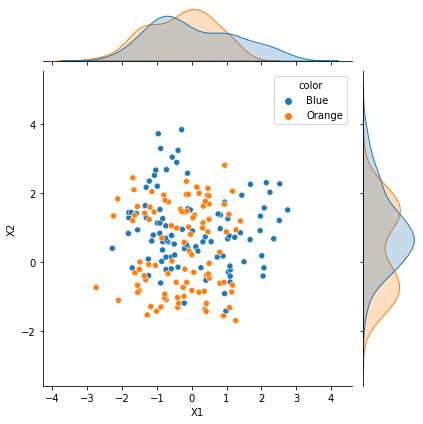

In [42]:
# Q4 Repeat
df_mix = df_mix.reset_index()
sns.jointplot(data = df_mix, x = "X1", y = "X2", hue = "color")

In [43]:
# Q5 Repeat
df_mix['Y'] = df_mix['color'].apply(lambda x: 0 if x == 'Blue' else 1)
df_mix

,index,X1,X2,color,Y
0,0,-2.275879,0.402107,Blue,0
1,1,-1.814863,0.830801,Blue,0
2,2,0.806232,0.294673,Blue,0
3,3,-0.112960,0.433300,Blue,0
4,4,0.818213,0.969071,Blue,0
...,...,...,...,...,...
195,95,-0.771427,-0.918914,Orange,1
196,96,-0.761646,1.792408,Orange,1
197,97,-2.737360,-0.731359,Orange,1
198,98,0.038833,1.287756,Orange,1


In [44]:
# Q6 Repeat
# Data
X = df_mix[['X1','X2']]
y = df_mix['Y']
# Create linear regression object
reg = LinearRegression()
# Fit the model
reg.fit(X, y)
# parameters
reg.score(X, y), reg.coef_, reg.intercept_

(0.08116164358949451, array([-0.07678918, -0.09797104]), 0.5558186131937579)

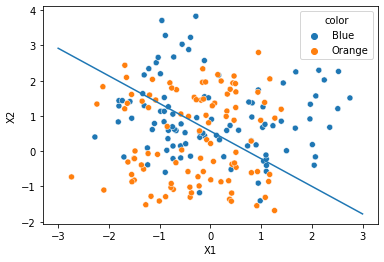

In [49]:
# Q7 Repeat
sns.scatterplot(data = df_mix, x = "X1", y = "X2", hue = "color")
plt.plot([-3,3], [f(-3), f(3)])

In [46]:
# Q8 Repeat
# Data
x = df_mix[['X1','X2']].to_numpy()
y = df_mix['Y']

# Train the Classifier
knn15 = neighbors.KNeighborsClassifier(15, weights='uniform')
knn15.fit(x, y)
knn1 = neighbors.KNeighborsClassifier(1, weights='uniform')
knn1.fit(x, y)

KNeighborsClassifier(n_neighbors=1)

Text(0.5, 1.0, 'KNN with k = 15')

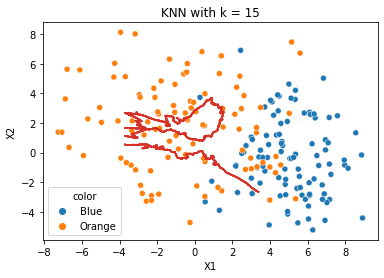

In [47]:
PAD = 1.0 # how much to "pad" around the min/max values. helps in setting bounds of plot
# create a mesh to plot in
x_min, x_max = x[:, 0].min() - PAD, x[:, 0].max() + PAD
y_min, y_max = x[:, 1].min() - PAD, x[:, 1].max() + PAD

H = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, H), np.arange(y_min, y_max, H))
Z = knn15.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors = ['#d73027'])

# Plot data
sns.scatterplot(data = df, x = "X1", y = "X2", hue = "color")
plt.title("KNN with k = 15")

Text(0.5, 1.0, 'KNN with k = 1')

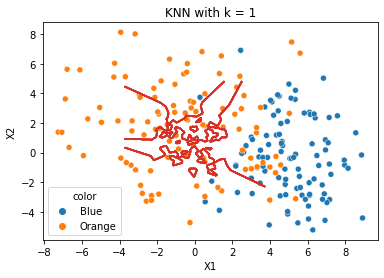

In [48]:
PAD = 1.0 # how much to "pad" around the min/max values. helps in setting bounds of plot
# create a mesh to plot in
x_min, x_max = x[:, 0].min() - PAD, x[:, 0].max() + PAD
y_min, y_max = x[:, 1].min() - PAD, x[:, 1].max() + PAD

H = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, H), np.arange(y_min, y_max, H))
Z = knn1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors = ['#d73027'])

# Plot data
sns.scatterplot(data = df, x = "X1", y = "X2", hue = "color")
plt.title("KNN with k = 1")